### **HANDELLING MISSING DATA**

#### **The ways to handel the missing datas are:**
&rarr; Removal\
&rarr; Imputation: Filling the missing values with some values
* Univarient
    - Numerical
        - mean/median
        - random
        - End of distribution
    - Catergorical
        - mode
* Multivarient
    - Knn Imputer
    - Iterative imputer

### **1. COMPLETE CASE ANALYSIS**

It is list wise deletion of cases, consists in discarding observations where values in any variables are missing. It is complete case analysis in the sense that it considers observations where information is present in all of the variables in the dataset.

#### 1.1 Assumptions:
* The values are randomly missing thus the distribution of the data will the change.

We need no data manipulation and cca is easy to implement. But it can exclude large part of the original dataset. Excluded obseravations may be informative for the analysis. 

For only upto 5% of the missing data we use cca, other wise we donot. CCA is only performed for MCAR(Missing completly at random ).

In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/a315efd557d2fc96984ded8f7f440af0320e6ae2/day35-complete-case-analysis/data_science_job.csv')

In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [6]:
data.shape

(19158, 13)

In [7]:
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

This means that using cca with gender 23% of the rows be lost. With the company_size, we will lose 32% of the data.

In [8]:
data.isnull().any(axis=1).sum()

np.int64(10724)

In [9]:
cols=[var for var in data.columns if data[var].isnull().mean()<0.05 and data[var].isnull().mean()>0]

In [10]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
len(data[cols].dropna())/len(data)*100

89.68577095730244

In [12]:
new_data=data[cols].dropna()

In [13]:
new_data.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


In [14]:
data.shape,new_data.shape

((19158, 13), (17182, 5))

In [15]:
#to check the validity of the cca
import matplotlib.pyplot as plt
def check_cca(column_name):
    plt.subplot(121)
    plt.hist(data[column_name],color='orange',bins=30)
    plt.title('Before removal')
    
    plt.subplot(122)
    plt.hist(new_data[column_name],bins=30)
    plt.title('After removal')
    
    plt.suptitle(f'{column_name}')
    plt.tight_layout()
    plt.show()

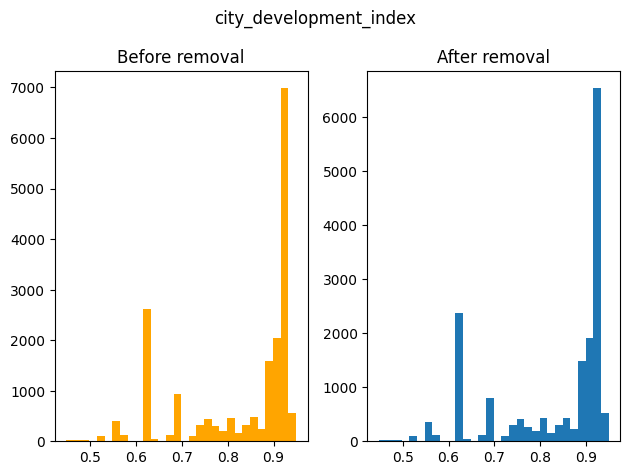

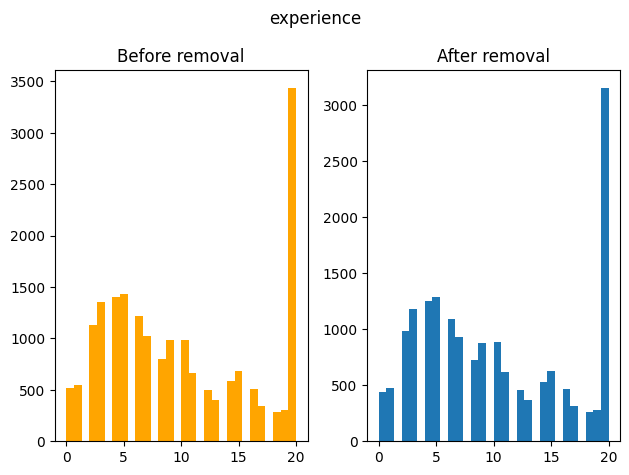

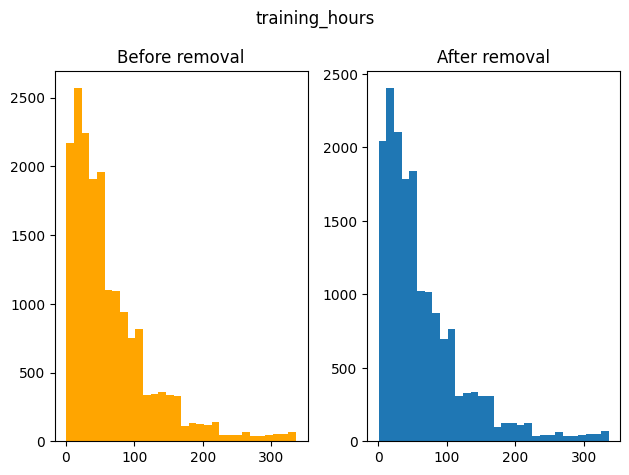

In [16]:
for col in cols:
    if pd.api.types.is_numeric_dtype(new_data[col]):
        check_cca(col)

Above plots shows that there is no change in the distribution thus the implementation of the cca was correct

In [17]:
import seaborn as sns
def check_kde(col_name):
    sns.kdeplot(data=data,x=col_name,label='Before')
    sns.kdeplot(data=new_data,x=col_name,label='After')
    plt.title(f'{col_name}')
    plt.legend()
    plt.show()

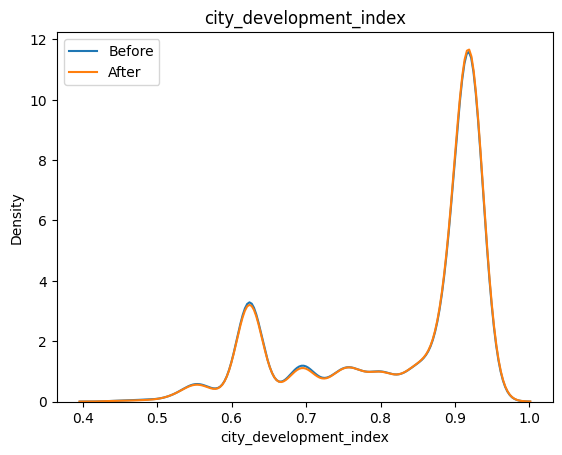

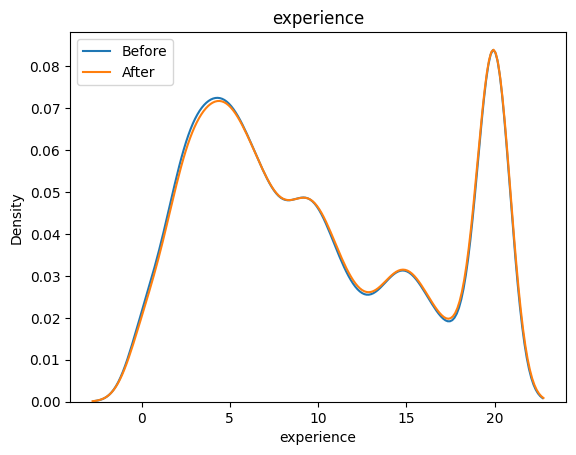

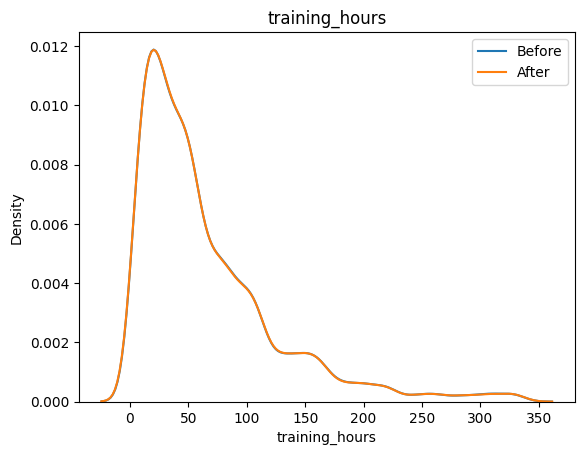

In [18]:
for col in cols:
    if pd.api.types.is_numeric_dtype(new_data[col]):
        check_kde(col)

enrolled_university
no_enrollment       12632
Full time course     3449
Part time course     1101
Name: count, dtype: int64


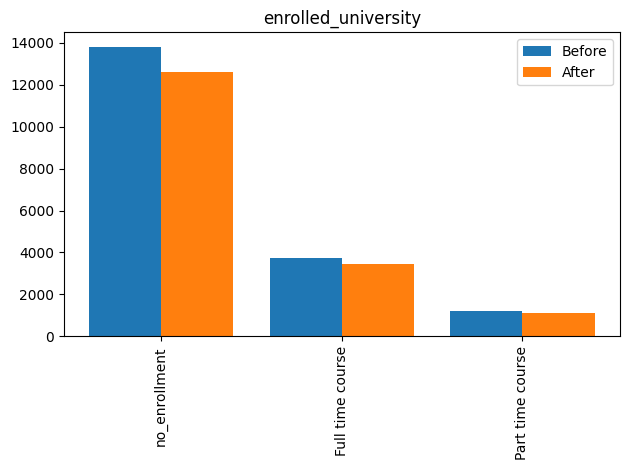

education_level
Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: count, dtype: int64


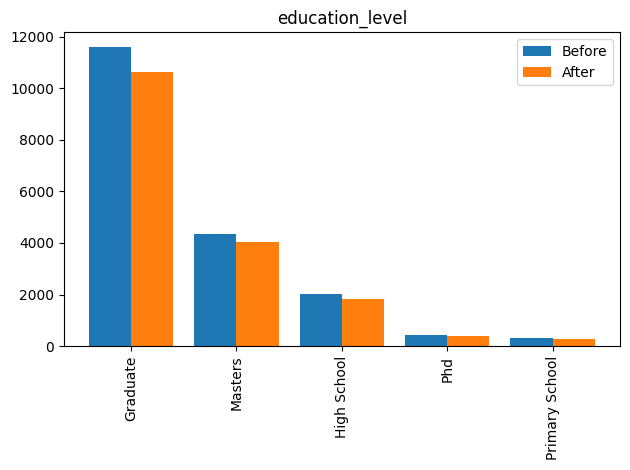

In [19]:
for col in cols:
    if pd.api.types.is_numeric_dtype(new_data[col]):
        continue
    else:
        #print(new_data[col].value_counts(),data[col].value_counts())
        width = 0.4  
        before_counts = data[col].value_counts()
        after_counts = new_data[col].value_counts()
        aligned_before, aligned_after = before_counts.align(after_counts, fill_value=0)
        print(aligned_after)
        indices = range(len(aligned_before))
        plt.bar([i - width/2 for i in indices], aligned_before, width=width, label='Before')
        plt.bar([i + width/2 for i in indices], aligned_after, width=width, label='After')
        
        plt.xticks(indices, aligned_before.index, rotation=90)
        plt.legend()
        plt.title(f'{col}')
        plt.tight_layout()
        plt.show()

### **1. SIMPLE IMPUTER**

#### 1.1. MEAN MEDIAN IMPUTATION
When the data is normally distributed we use the mean since it would be the better approach for the central tendency. But for the skewed distribution meadian is used for the imputation. Imuputation means filling the missing datas with the certain value. In this case we use mean and median.

<u> Advantages </u>
1. Simple
2. Can be used for the missing data more than 5% of the total data.

<u> Disadvantages</u>
1. Affected by the shape of the distribution 
2. Affected by the outliers.
3. Covarience/correlation change

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [21]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [23]:
data=data.drop(columns=['city','enrolled_university','major_discipline','company_size'])

In [24]:
data.head()

,enrollee_id,city_development_index,gender,relevent_experience,education_level,experience,company_type,training_hours,target
0,8949,0.920,Male,Has relevent experience,Graduate,20.0,NaN,36.0,1.0
1,29725,0.776,Male,No relevent experience,Graduate,15.0,Pvt Ltd,47.0,0.0
2,11561,0.624,NaN,No relevent experience,Graduate,5.0,NaN,83.0,0.0
3,33241,0.789,NaN,No relevent experience,Graduate,0.0,Pvt Ltd,52.0,1.0
4,666,0.767,Male,Has relevent experience,Masters,20.0,Funded Startup,8.0,0.0


In [25]:
data.isnull().mean()*100


enrollee_id                0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
education_level            2.401086
experience                 0.339284
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [26]:
data.isnull().any(axis=1).sum()

np.int64(9671)

### **Using pandas**


In [27]:
mean_cdi=data['city_development_index'].mean()
median_cdi=data['city_development_index'].median()

mean_exp=data['experience'].mean()
median_exp=data['experience'].median()

mean_th=data['training_hours'].mean()
median_th=data['training_hours'].median()

In [28]:
mean_cdi,median_cdi,mean_exp,median_exp,mean_th,median_th

(np.float64(0.8289509074361583),
 np.float64(0.903),
 np.float64(9.92803645315037),
 np.float64(9.0),
 np.float64(65.18578729882557),
 np.float64(47.0))

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

In [30]:
def distribution(col_names):
    for col in col_names:
        sns.kdeplot(data=data,x=col)
        plt.title(f'{col}')
        plt.show()


In [31]:
column_names=['city_development_index','experience','training_hours']

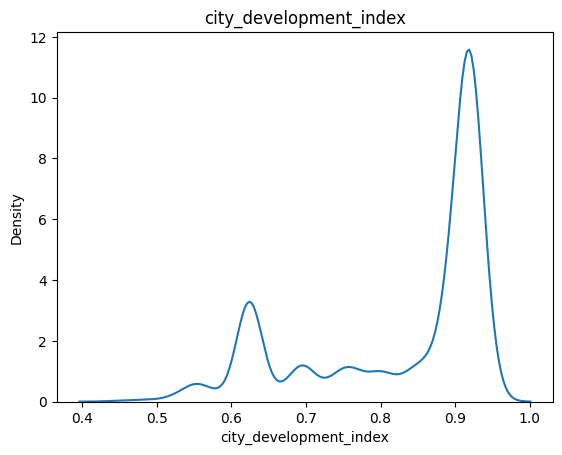

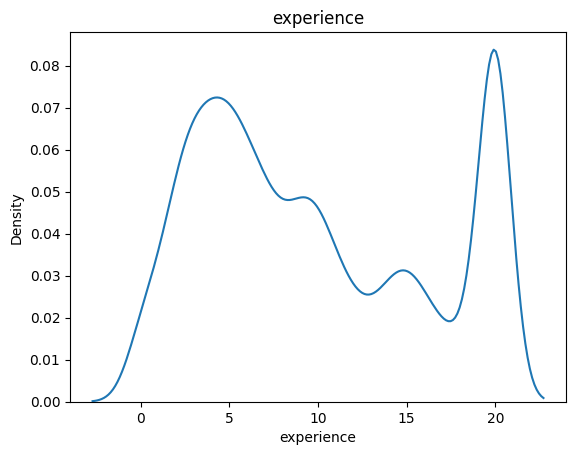

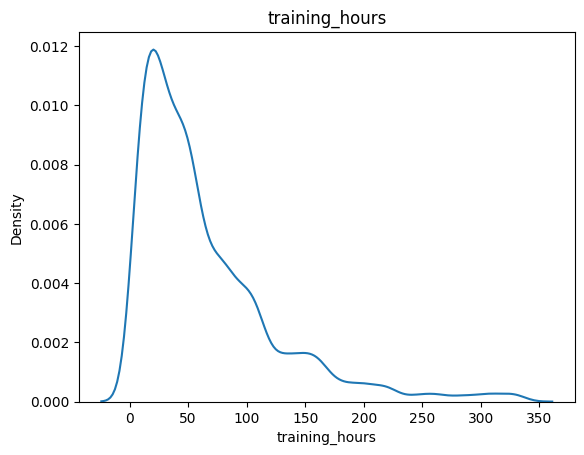

In [32]:
distribution(column_names)

Here the distribution is not normal so that we will use median to fill the values.

In [33]:
for col in column_names:
    data[col]=data[col].fillna(data[col].median())

In [34]:
data['gender'] = data['gender'].fillna(data['gender'].mode().iloc[0])

In [35]:
data.isnull().sum()

enrollee_id                  0
city_development_index       0
gender                       0
relevent_experience          0
education_level            460
experience                   0
company_type              6140
training_hours               0
target                       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   education_level         18698 non-null  object 
 5   experience              19158 non-null  float64
 6   company_type            13018 non-null  object 
 7   training_hours          19158 non-null  float64
 8   target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ MB


In [37]:
data=data.drop(columns=['company_type'])
data['education_level']=data['education_level'].fillna(data['education_level'].mode().iloc[0])

In [38]:
data.head()

,enrollee_id,city_development_index,gender,relevent_experience,education_level,experience,training_hours,target
0,8949,0.920,Male,Has relevent experience,Graduate,20.0,36.0,1.0
1,29725,0.776,Male,No relevent experience,Graduate,15.0,47.0,0.0
2,11561,0.624,Male,No relevent experience,Graduate,5.0,83.0,0.0
3,33241,0.789,Male,No relevent experience,Graduate,0.0,52.0,1.0
4,666,0.767,Male,Has relevent experience,Masters,20.0,8.0,0.0


### **Using Scikit Learn**

In [39]:
data=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/a315efd557d2fc96984ded8f7f440af0320e6ae2/day35-complete-case-analysis/data_science_job.csv')

In [40]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='most_frequent')
from sklearn.compose import ColumnTransformer


In [43]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [44]:
column_names=['city_development_index','experience','training_hours']

In [45]:
data=data.drop(columns=['company_type'])

In [46]:
tf=ColumnTransformer(
    transformers=[
        ('imputer1',imputer1,column_names),
        ('imputer2',imputer2,['gender','enrolled_university','education_level','major_discipline','company_size'])
    ],
    remainder='passthrough'
)

In [47]:
X_data=data.drop(columns=['target'])

In [48]:
X_data_transform=tf.fit_transform(X_data)

In [49]:
X_data_transform.shape

(19158, 11)

In [50]:
tf.named_transformers_


{'imputer1': SimpleImputer(strategy='median'),
 'imputer2': SimpleImputer(strategy='most_frequent'),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [51]:
#extracting the mean of the city_development_index,experience,training_hours
means=np.round(tf.named_transformers_['imputer1'].statistics_,0)
means = means.astype(int)
means

array([ 1,  9, 47])

In [52]:
#extracting the modes of the categorical columns
print(tf.named_transformers_['imputer2'].statistics_)


['Male' 'no_enrollment' 'Graduate' 'STEM' '50-99']


In [53]:
X_data_transform=pd.DataFrame(X_data_transform,columns=['city_development_index','experience','training_hours','gender','enrolled_university','education_level','major_discipline','company_size','enroll_id','city','relevant_experience'])

In [54]:
X_data_transform.head(2)

,city_development_index,experience,training_hours,gender,enrolled_university,education_level,major_discipline,company_size,enroll_id,city,relevant_experience
0,0.92,20.0,36.0,Male,no_enrollment,Graduate,STEM,50-99,8949,city_103,Has relevent experience
1,0.776,15.0,47.0,Male,no_enrollment,Graduate,STEM,50-99,29725,city_40,No relevent experience


In [55]:
numeric_cols=['city_development_index','training_hours','experience']
for col in numeric_cols:
    X_data_transform[col]=X_data_transform[col].astype(float)

Text(0.5, 1.0, 'After the imputation')

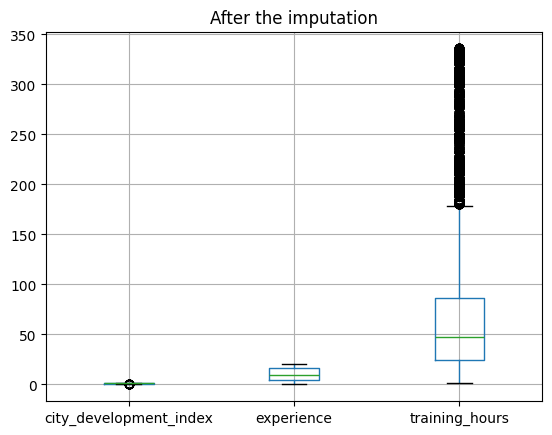

In [56]:
X_data_transform[['city_development_index','experience','training_hours']].boxplot()
plt.title('After the imputation')

### **Arbitary value imputation**

Replace the missing vlaues with the word 'Missing(for the categorical data)' and 'Random value(for the numeric columns)'. This is used in the case when the data is not missing at random.

In [57]:
data=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/a315efd557d2fc96984ded8f7f440af0320e6ae2/day35-complete-case-analysis/data_science_job.csv')

In [58]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [59]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [60]:
data['experience_0']=data['experience'].fillna(0)
data['experience_100']=data['experience'].fillna(100)

In [61]:
print('Original varience of the expereince:',data['experience'].var())
print('Original varience of the expereince_0:',data['experience_0'].var())
print('Original varience of the expereince_100:',data['experience_100'].var())

Original varience of the expereince: 42.31851676548442
Original varience of the expereince_0: 42.50823035502217
Original varience of the expereince_100: 69.60892858541223


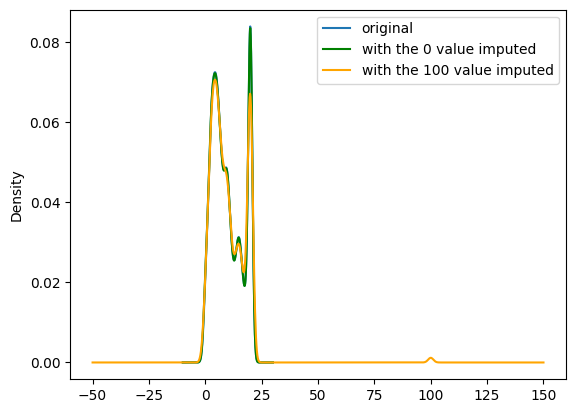

In [62]:
plt.figure()
ax=plt.subplot(111)
data['experience'].plot(kind='kde',ax=ax,label='original')
data['experience_0'].plot(kind='kde',ax=ax,color='green',label='with the 0 value imputed')
data['experience_100'].plot(kind='kde',ax=ax,color='orange',label='with the 100 value imputed')
ax.legend()

In [63]:
data['training_hours']

0         36.0
1         47.0
2         83.0
3         52.0
4          8.0
         ...  
19153     42.0
19154     52.0
19155     44.0
19156     97.0
19157    127.0
Name: training_hours, Length: 19158, dtype: float64

In [64]:
data['training_hours_minus1']=data['training_hours'].fillna(-1)
data['training_hours_99']=data['training_hours'].fillna(99)

In [65]:
print('Original varience of the training_hours:',data['training_hours'].var())
print('Original varience of the training_hours:',data['training_hours_minus1'].var())
print('Original varience of the training_hours:',data['training_hours_99'].var())

Original varience of the training_hours: 3586.2881933989406
Original varience of the training_hours: 3611.043987432314
Original varience of the training_hours: 3486.7804008620956


In [ ]:
plt.figure()
ax=plt.subplot(111)
data['training_hours'].plot(kind='kde',ax=ax,label='original')
data['training_hours_minus1'].plot(kind='kde',ax=ax,color='green',label='with the -1 value imputed')
data['training_hours_99'].plot(kind='kde',ax=ax,color='orange',label='with the 99 alue imputed')
ax.legend()

In [ ]:
imputer1=SimpleImputer(strategy='constant',fill_value=-1)
imputer1=SimpleImputer(strategy='constant',fill_value=99)
trf=ColumnTransformer(transformers=[
    ('imputer1',imputer1,['experience','training_hours']),
    ('imputer2',imputer2,['experience','training_hours'])
],remainder='passthrough')


In [ ]:
trf.fit(data)

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['experience', 'training_hours']),
                                ('imputer2',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['experience', 'training_hours'])])

### **End of distribution Imputation**

End of distribution imputation: impuation of the value at the end of the distribution\
for normal distribution :$ mean+ 3\sigma ,mean-3\sigma$ \
for skewed distribution :$ Q_1-1.5*IQR,Q_3+1.5*IQR$\
It is easy to use but it changes pdf, varience. Is is used if the data is not missing at random. 